## Análise Exploratória de Dados Cavid Picos - ALUNO ***

#### Neste notebook usaremos uma pesquisa recente realizada em Picos sobre o covid na região. Nosso objetivo é fazer uma investigação inicial dos dados a fim de detectar problemas com os dados, necessidade de mais variáveis, falhas na organização e necessidades de transformação.

In [1]:
# Importando os pacotes 
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt

## : Neste seção você deve carregar o dataset (Apenas a primeira pagina):
    - Apresentar as informações gerais
    - Renomear as colunas (Para fascilitar o acesso as variaveis)
    - Identificar valores ausentes(Nulos) e Trata-los: Você pode excluir as linhas, colunas, substituir valores, enfim. Escolha a o método que acha correto e explique o motivo da escolha. 
    - Identificar dados que podem ser convertidos em dados categoricos e trata-los
    
    OBS: Sempre que for excluir uma informação faça uma copia do dataset original. Exemplo: df (original), df_clean(valore ausentes tratados), df_categoricos (Apenas com as variaveis categoricas)

In [2]:
# Carregando o dataset (Apenas pagina 1 com coluna ID se index)
#(Coloque o código aqui)
df = pd.read_csv("covid_picos - Completo.csv", sep=",")

In [3]:
#renomenado colunas (Utilize a lista abaixo como nome nome para as colunas)
columns1 = ['Id','Numero_da_Notificacao','Data_da_Notificacao','Data_do_inicio_dos_sintomas','Profissional_de_Seguranca',
'Raca_Cor','Sexo','Data_de_Nascimento','Idade','Bairro','Sintoma_Dor_de_Garganta','Sintoma_Dispneia','Sintoma_Febre','Sintoma_Tosse',
'Sintoma_Outros','Sintoma_Dor_de_cabeca','Sintoma_Disturbio_Gustativo','Sintoma_Disturbio_Olfativo','Sintoma_Coriza','Assintomatico',
'Condições_Doenças_respiratorias_cronicas_descompensadas','Condições_Doenças_cardiacas_cronicas','Condições_Diabetes','Condições_Doencas_renais_cronicas_',
'Condições_Imunossupressao','Condições_Gestante','Condições_Portador_de_doenças_cromossómicas','Condições_Obesidade',
'Tipo_de_Teste','Classificação_Final','Evolucao_do_Caso']

In [4]:
df

,ID,Nº da notificação,Data da Notificação,Data do início dos sintomas,É profissional de saúde?,Raça/Cor,Sexo,Data de Nascimento,Idade,Bairro,...,Condições - Doenças cardíacas crônicas,Condições - Diabetes,Condições - Doenças renais crônicas,Condições - Imunossupressão,Condições- Gestante,Condições - Portador de doenças cromossómicas,Condições - Obesidade,Tipo de Teste,Classificação Final,Evolução do Caso
0,1,2.220004e+11,4/25/2020,4/18/2020,Sim,Branca,Feminino,8/7/1986,33,MALVA,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
1,2,2.220004e+11,4/25/2020,3/23/2020,Não,Parda,Masculino,4/22/1985,35,PASSAGEM DAS PEDRAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
2,3,2.220004e+11,4/25/2020,4/15/2020,Sim,Parda,Feminino,11/19/1988,31,PASSAGEM DAS PEDRAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
3,4,2.220004e+11,4/26/2020,4/10/2020,Sim,Parda,Feminino,9/9/1988,31,PEDRINHAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
4,5,2.220005e+11,4/27/2020,4/27/2020,Não,Amarela,Masculino,2/11/1967,53,CENTRO,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,4521,3.160521e+11,11/12/2020,10/31/2020,Não,Parda,Feminino,5/25/1935,85,BOA SORTE,...,Sim,Não,Não,Não,Não,Não,Não,RT-PCR,NaN,Obito
4521,4522,3.160562e+11,11/17/2020,10/27/2020,Não,Parda,Masculino,8/17/1946,74,UMARI,...,Sim,Sim,Não,Não,Não,Não,Não,RT-PCR,NaN,Obito
4522,4523,3.160578e+11,11/19/2020,11/13/2020,Não,Parda,Masculino,5/19/1944,76,JUNCO,...,Sim,Sim,Não,Não,Não,Não,Não,RT-PCR,NaN,Obito
4523,4524,3.160616e+11,23/11/2020,11/7/2020,Não,Parda,Masculino,8/8/1964,56,BOA VISTA,...,Não,Não,Não,Não,Não,Não,Não,RT-PCR,NaN,Obito


In [5]:
#Aprensentando informações gerais
df_rename = df.set_axis(columns1, axis="columns")
df_rename

,Id,Numero_da_Notificacao,Data_da_Notificacao,Data_do_inicio_dos_sintomas,Profissional_de_Seguranca,Raca_Cor,Sexo,Data_de_Nascimento,Idade,Bairro,...,Condições_Doenças_cardiacas_cronicas,Condições_Diabetes,Condições_Doencas_renais_cronicas_,Condições_Imunossupressao,Condições_Gestante,Condições_Portador_de_doenças_cromossómicas,Condições_Obesidade,Tipo_de_Teste,Classificação_Final,Evolucao_do_Caso
0,1,2.220004e+11,4/25/2020,4/18/2020,Sim,Branca,Feminino,8/7/1986,33,MALVA,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
1,2,2.220004e+11,4/25/2020,3/23/2020,Não,Parda,Masculino,4/22/1985,35,PASSAGEM DAS PEDRAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
2,3,2.220004e+11,4/25/2020,4/15/2020,Sim,Parda,Feminino,11/19/1988,31,PASSAGEM DAS PEDRAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
3,4,2.220004e+11,4/26/2020,4/10/2020,Sim,Parda,Feminino,9/9/1988,31,PEDRINHAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
4,5,2.220005e+11,4/27/2020,4/27/2020,Não,Amarela,Masculino,2/11/1967,53,CENTRO,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,4521,3.160521e+11,11/12/2020,10/31/2020,Não,Parda,Feminino,5/25/1935,85,BOA SORTE,...,Sim,Não,Não,Não,Não,Não,Não,RT-PCR,NaN,Obito
4521,4522,3.160562e+11,11/17/2020,10/27/2020,Não,Parda,Masculino,8/17/1946,74,UMARI,...,Sim,Sim,Não,Não,Não,Não,Não,RT-PCR,NaN,Obito
4522,4523,3.160578e+11,11/19/2020,11/13/2020,Não,Parda,Masculino,5/19/1944,76,JUNCO,...,Sim,Sim,Não,Não,Não,Não,Não,RT-PCR,NaN,Obito
4523,4524,3.160616e+11,23/11/2020,11/7/2020,Não,Parda,Masculino,8/8/1964,56,BOA VISTA,...,Não,Não,Não,Não,Não,Não,Não,RT-PCR,NaN,Obito


In [6]:
#Identificando valores ausentes

#retorna valores estatisticos para variaveis numericas
df_rename.describe()



,Id,Numero_da_Notificacao,Idade
count,4525.000000,4.521000e+03,4525.000000
mean,2263.000000,2.271392e+11,40.601547
std,1306.399314,1.019331e+11,17.482457
min,1.000000,1.120062e+11,0.000000
25%,1132.000000,2.220111e+11,28.000000
50%,2263.000000,2.220192e+11,38.000000
75%,3394.000000,2.220356e+11,52.000000
max,4525.000000,4.120039e+12,104.000000


In [7]:
#retorna resumo de valores nao nulos
df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Id                                                       4525 non-null   int64  
 1   Numero_da_Notificacao                                    4521 non-null   float64
 2   Data_da_Notificacao                                      4521 non-null   object 
 3   Data_do_inicio_dos_sintomas                              4521 non-null   object 
 4   Profissional_de_Seguranca                                4525 non-null   object 
 5   Raca_Cor                                                 4515 non-null   object 
 6   Sexo                                                     4525 non-null   object 
 7   Data_de_Nascimento                                       4525 non-null   object 
 8   Idade                       

In [8]:
#retorna a soma dos valores nulos encontrados
df_rename.isnull().sum()

Id                                                           0
Numero_da_Notificacao                                        4
Data_da_Notificacao                                          4
Data_do_inicio_dos_sintomas                                  4
Profissional_de_Seguranca                                    0
Raca_Cor                                                    10
Sexo                                                         0
Data_de_Nascimento                                           0
Idade                                                        0
Bairro                                                       0
Sintoma_Dor_de_Garganta                                      4
Sintoma_Dispneia                                             2
Sintoma_Febre                                                4
Sintoma_Tosse                                                4
Sintoma_Outros                                               4
Sintoma_Dor_de_cabeca                                  

In [30]:
#Tratando valores ausentes
df_clean = df_rename.dropna()
df_clean
### o drop nos valores ausentes é devido aos campos Classificação_Final e Evolucao_do_Caso pois
### tem muitos valores ausentes e se preenchidos poderia ter discrepancia nos resultados além de 
### não serem valores numericos
df_clean["Classificação_Final"].value_counts()

Confirmado Laboratorial                4237
Confirmado ClÃ­nico-EpidemiolÃ³gico       5
Descartado                                3
Confirmado ClÃ­nico-Imagem                1
Confirmado Clinico-Epidemiologico         1
Name: Classificação_Final, dtype: int64

In [10]:
lista = ["Profissional_de_Seguranca", "Condições_Doenças_cardiacas_cronicas", "Condições_Diabetes", "Condições_Doencas_renais_cronicas_","Condições_Imunossupressao", "Condições_Gestante", "Condições_Portador_de_doenças_cromossómicas", "Condições_Obesidade"]

In [11]:
# Tranformando strings em numeros (Neste caso converta apenas as variaveis com SIM ou Não)
for a in df_clean:
    if a in lista:
        df_clean = df_clean.replace({'Sim': 1})
        df_clean = df_clean.replace({'Não': 0})

In [12]:
df_clean.head(5)

,Id,Numero_da_Notificacao,Data_da_Notificacao,Data_do_inicio_dos_sintomas,Profissional_de_Seguranca,Raca_Cor,Sexo,Data_de_Nascimento,Idade,Bairro,...,Condições_Doenças_cardiacas_cronicas,Condições_Diabetes,Condições_Doencas_renais_cronicas_,Condições_Imunossupressao,Condições_Gestante,Condições_Portador_de_doenças_cromossómicas,Condições_Obesidade,Tipo_de_Teste,Classificação_Final,Evolucao_do_Caso
0,1,2.220004e+11,4/25/2020,4/18/2020,1,Branca,Feminino,8/7/1986,33,MALVA,...,0,0,0,0,0,0,0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
1,2,2.220004e+11,4/25/2020,3/23/2020,0,Parda,Masculino,4/22/1985,35,PASSAGEM DAS PEDRAS,...,0,0,0,0,0,0,0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
2,3,2.220004e+11,4/25/2020,4/15/2020,1,Parda,Feminino,11/19/1988,31,PASSAGEM DAS PEDRAS,...,0,0,0,0,0,0,0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
3,4,2.220004e+11,4/26/2020,4/10/2020,1,Parda,Feminino,9/9/1988,31,PEDRINHAS,...,0,0,0,0,0,0,0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
4,5,2.220005e+11,4/27/2020,4/27/2020,0,Amarela,Masculino,2/11/1967,53,CENTRO,...,0,0,0,0,0,0,0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura


In [13]:
df_clean["Condições_Portador_de_doenças_cromossómicas"].value_counts()

0    4245
1       2
Name: Condições_Portador_de_doenças_cromossómicas, dtype: int64

## : A seguir gere os graficos ou imagens que impliquem na resposta de cada afirmação/pergunta citada abaixo.

Para todas as analises abaixo descreva a resposta de acordo com sua interpretação. Fique a vontade para gerar novas informações. Pense que essas informações podem auxiliar a prefeitura de picos na melhor tomada de decisão neste contexto.

Para quem quiser melhor gerar graficos sugiro assistir a palestra sobre visualização de dados (Link no material semana 2). 
Link dos exemplos de figuras com matplotlib: https://matplotlib.org/stable/gallery/index.html


### Distribuição de Idade

In [14]:
x= df_clean.Idade.value_counts()

In [15]:
x.sort_index()

0       7
1       7
2      11
3       6
4       4
       ..
92      2
93      2
100     1
101     1
104     1
Name: Idade, Length: 96, dtype: int64

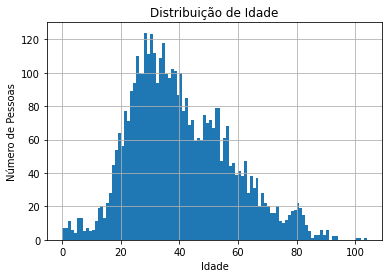

In [16]:
# Qual a distribuição de idade dos participantes da pesquisa? (Histograma)
df_clean.Idade.hist(bins=104)
plt.xlabel("Idade")
plt.ylabel("Número de Pessoas")
plt.title("Distribuição de Idade")
plt.show()



### Distribuição de Sexo

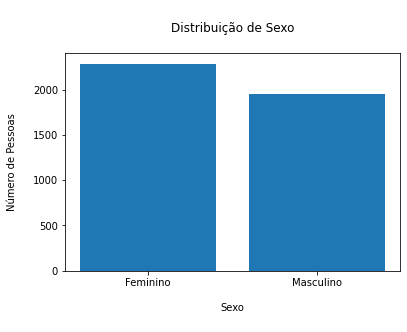

In [17]:
# Qual é a distribuição de sexo dos participantes da pesquisa?
df_sex = df_clean.Sexo.value_counts().index
df_sex_qtd = df_clean.Sexo.value_counts()


plt.bar(df_sex, df_sex_qtd)
plt.xlabel("\nSexo\n")
plt.ylabel("Número de Pessoas\n")
plt.title("\nDistribuição de Sexo\n")
plt.show()

### Relação de Idade (por Faixa Etaria) e Casos Assintomatico

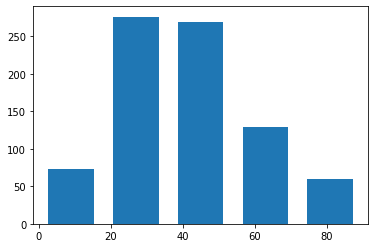

In [25]:
# Qual a faixa etaria com maior indice de pessoas assintomaticas?
plt.hist(df_clean.query("Assintomatico==1").Idade,5,rwidth=0.7)
plt.show()

In [ ]:
#vemos então que o maior indice fica entre 20 anos 40


### Relação da evolução de casos por faixa etaria de idade

In [29]:
# Qual a relação entre a Idade e evolução do caso?
df_rename["Evolucao_do_Caso"].value_counts()

Cura     4257
Obito      91
Name: Evolucao_do_Caso, dtype: int64

### Distribuição racial em casos de covid

In [ ]:
# Demonstrar o distribuição racial em casos de covid!

### Relação da evolução de casos por faixa etaria de idade

In [ ]:
# Demonstrar o distribuição racial em casos com evolução ao Obito!

### Matriz de Correlação

In [ ]:
# Identificando a correlação entre as variáveis